# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

**Notes:**<br>
> X &rarr; variables indépendantes<br>
> y &rarr; variables dépendantes

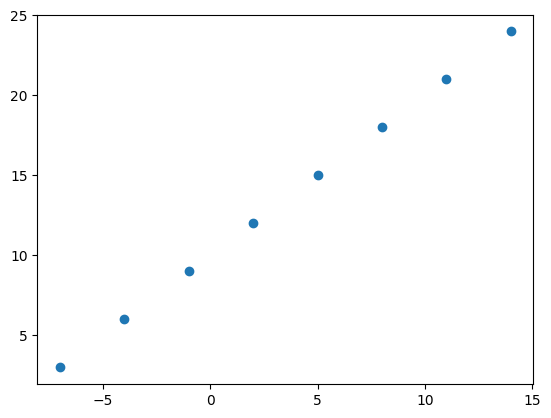

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
# On remarque une relation entre X et y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
# Turn our Numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

```python
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
```
C'est la même chose que:
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
```

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 644ms/step - loss: 11.2575 - mean_absolute_error: 11.2575
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.1250 - mean_absolute_error: 11.1250
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9925 - mean_absolute_error: 10.9925
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 10.8600 - mean_absolute_error: 10.8600
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.7275 - mean_absolute_error: 10.7275


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 149ms/step


array([[13.917085]], dtype=float32)

In [13]:
y_pred + 10.0808 # pour prendre en compte l'erreur absolue de la dernière epoch

array([[23.997885]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuil our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mean_absolute_error)

# Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 448ms/step - loss: 9.8544 - mean_absolute_error: 9.8544
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7219 - mean_absolute_error: 9.7219
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5894 - mean_absolute_error: 9.5894
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4569 - mean_absolute_error: 9.4569
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3244 - mean_absolute_error: 9.3244
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1919 - mean_absolute_error: 9.1919
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0594 - mean_absolute_error: 9.0594
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9269 - mean_absolute_error: 8.9269
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7944 - mean_absolute_error: 8.7944
Epoch 10/100
1/1 [==

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's predictions has improved..
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[29.809649]], dtype=float32)

In [17]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 619ms/step - loss: 13.2075 - mean_absolute_error: 13.2075
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4675 - mean_absolute_error: 12.4675
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7266 - mean_absolute_error: 11.7266
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9834 - mean_absolute_error: 10.9834
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2359 - mean_absolute_error: 10.2359
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4828 - mean_absolute_error: 9.4828
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7226 - mean_absolute_error: 8.7226
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9536 - mean_absolute_error: 7.9536
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1735 - mean_absolute_error: 7.1735
Epoch 10/1

In [18]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[25.650694]], dtype=float32)

## Evaluating a model

In practice, a typical workflow wou'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the dataset
y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

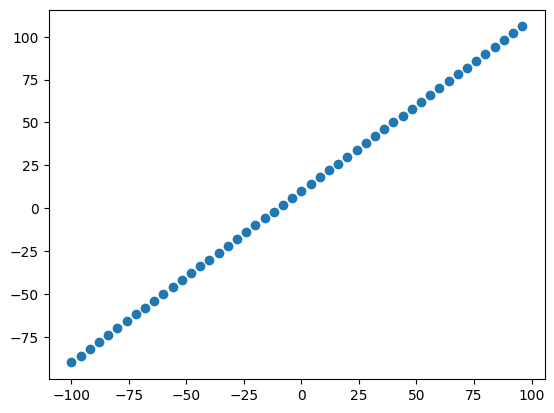

In [22]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** -  the model learns from this data, wich is typically 70-80% of the total data you have available.
* **Validation set** - model gets tuned on this data, which is typilcally 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [23]:
# Check the length of how many samples we have
len(X)

50

In [24]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testinh samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let'visualize it again!

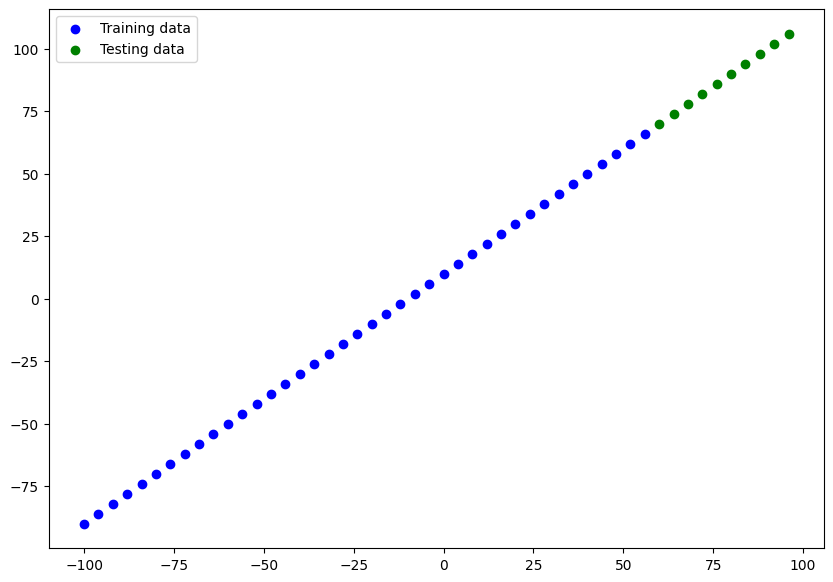

In [25]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend()

In [26]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mean_absolute_error)

## 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

### Visualizing the model

```
model.summary()
```
Does not work because the model has not been trained and given the input_shape argument at the first layer.
At the very least, you need to either:
* Train the model
* Specify the input_shape of the first layer

In [27]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [28]:
# Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # Specify input_shape
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same above)
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mean_absolute_error)



In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.
https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

#### Input layer
Le nombre de paramètres de la couche input_layer est de 20 car:
N = nombre de caractéristiques d'entrée
W = le poids (weight)
B = le biais (bias)
```
N * W + B
```
* En entrée nous avons **une** caractéristique (**une** colonne dans X) &rarr; N = **1**
* Nous avons **10** neurones sur la 1ère couche et chacune à un poids et un biais &rarr; W = **10**, B = **10**

```
1 * 10 + 10 = 20
```
#### Output layer
Le nombre de paramètres de la couche output_layer est de 11 car:
* N = 10 car le seul neurone de la couche de sortie reçois 10 caractéristiques
* Le neurone à un poids (W = 1) et à un biais (B = 1)

```
10 * 1 + 1 = 11
```
#### Total params
Le nombre total de paramètres du réseau est de:
```
20 + 11 = 31
```



In [30]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

# 51

In [31]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


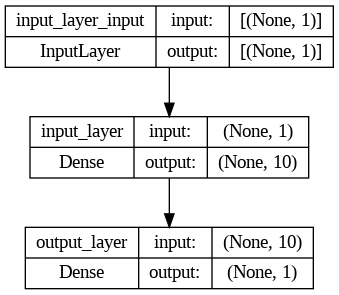

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# 52

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [33]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 50ms/step


array([[ 76.2464  ],
       [ 81.214874],
       [ 86.183334],
       [ 91.1518  ],
       [ 96.12026 ],
       [101.08873 ],
       [106.0572  ],
       [111.02566 ],
       [115.99412 ],
       [120.96259 ]], dtype=float32)

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn into a function.

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

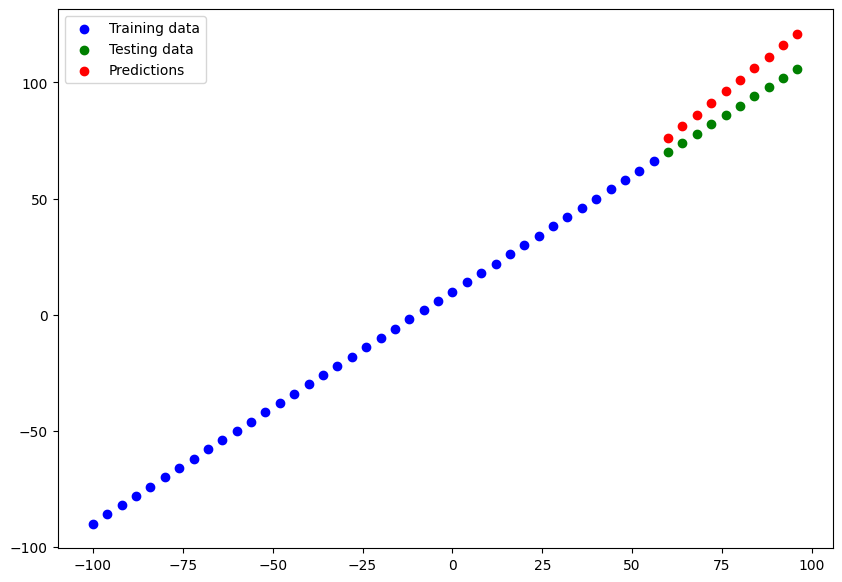

In [35]:
plot_predictions()

# 53

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - men square error, "square the average errors"

In [36]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 155ms/step - loss: 10.6045 - mean_absolute_error: 10.6045


[10.604497909545898, 10.604497909545898]

In [37]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.452161, 11.11405 , 10.      , 10.23036 , 11.648105, 14.253238,
       18.057198, 23.025658, 27.994116, 32.962593], dtype=float32)>

Ci-dessous on remarque que y_pred et y_test n'ont pas le même shape!!!

In [38]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.2464  ],
       [ 81.214874],
       [ 86.183334],
       [ 91.1518  ],
       [ 96.12026 ],
       [101.08873 ],
       [106.0572  ],
       [111.02566 ],
       [115.99412 ],
       [120.96259 ]], dtype=float32)>

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.2464  ,  81.214874,  86.183334,  91.1518  ,  96.12026 ,
       101.08873 , 106.0572  , 111.02566 , 115.99412 , 120.96259 ],
      dtype=float32)>

# 54

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.604497>

On obtiens la même valeur en faisant:
```
model.evaluate(X_test, y_test)
```
et
```
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
```

# 55

In [42]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=120.19324>

In [43]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

# 56

### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mean_absolute_error)
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 56.2794 - mean_absolute_error: 56.2794
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 21.9744 - mean_absolute_error: 21.9744
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9868 - mean_absolute_error: 10.9868
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4133 - mean_absolute_error: 9.4133
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2968 - mean_absolute_error: 10.2968
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5459 - mean_absolute_error: 9.5459
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6688 - mean_absolute_error: 8.6688
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0650 - mean_absolute_error: 9.0650
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.9737 - mean_absolute_error: 18.9737
Epoch 10/100
2/2

1/1 [==============================] - 0s 70ms/step


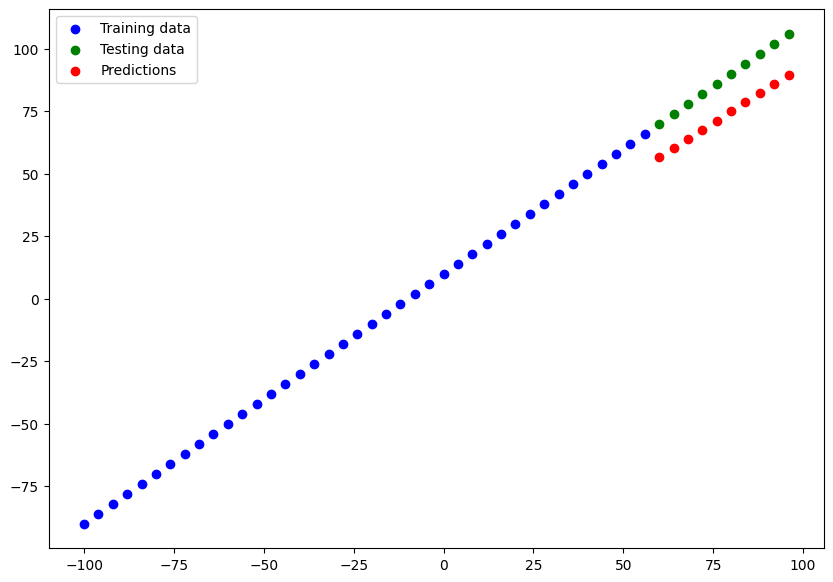

In [45]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [46]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.52198 ],
        [60.204277],
        [63.886574],
        [67.56887 ],
        [71.251175],
        [74.93347 ],
        [78.61577 ],
        [82.29807 ],
        [85.98037 ],
        [89.66267 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.52198 , 60.204277, 63.886574, 67.56887 , 71.251175, 74.93347 ,
        78.61577 , 82.29807 , 85.98037 , 89.66267 ], dtype=float32)>)

In [47]:
# Calculte model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.907679>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.07156>)

# 57

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [48]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.mean_squared_error)

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 40.4537 - mean_squared_error: 2523.3257
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 24.9309 - mean_squared_error: 815.4105
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 31.3023 - mean_squared_error: 1428.8246
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 22.3353 - mean_squared_error: 714.2767
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.4150 - mean_squared_error: 218.9339
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8053 - mean_squared_error: 128.2188
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7664 - mean_squared_error: 170.7839
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7671 - mean_squared_error: 126.8754
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 36.4755 - mean_squared_error: 2030.9860
Epoc

1/1 [==============================] - 0s 81ms/step


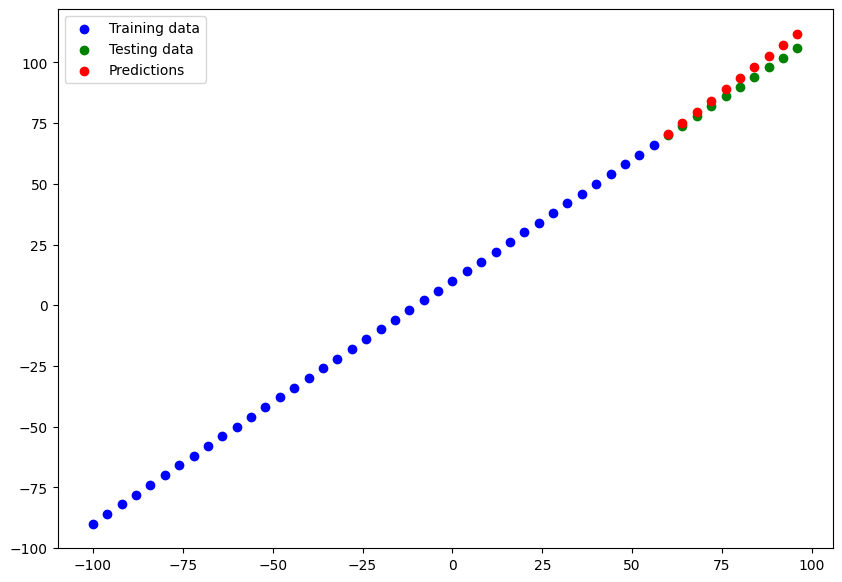

In [49]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [50]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1362343>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.664867>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 20.6547 - mean_absolute_error: 20.6547
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 25.4771 - mean_absolute_error: 25.4771
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 30.2611 - mean_absolute_error: 30.2611
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 16.1419 - mean_absolute_error: 16.1419
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 21.9402 - mean_absolute_error: 21.9402
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.6191 - mean_absolute_error: 11.6191
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.7272 - mean_absolute_error: 12.7272
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1269 - mean_absolute_error: 11.1269
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.4244 - mean_absolute_error: 40.4244
Epoch 10/

1/1 [==============================] - 0s 325ms/step


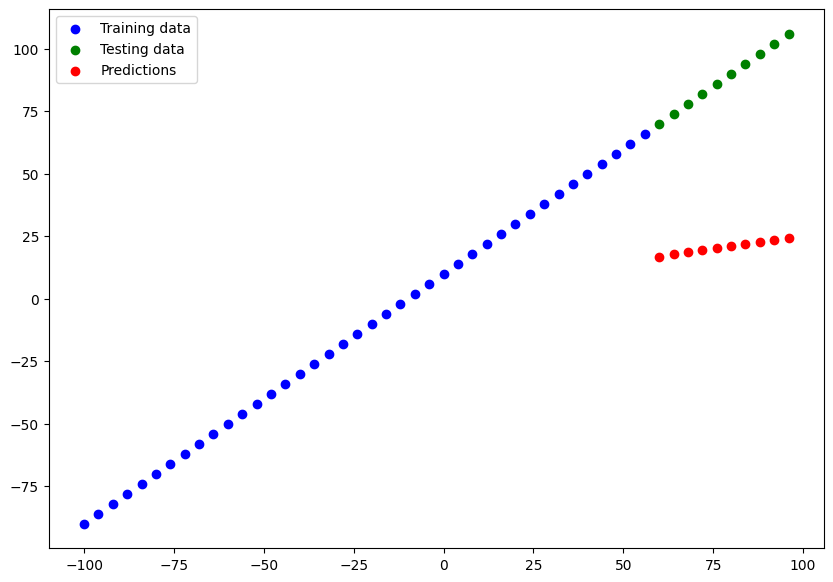

In [52]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [53]:
# Caluclate model_3 evaluation metrcis
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42639>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4629.8774>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

# 58

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [54]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.907679,223.071564
1,model_2,3.136234,12.664867
2,model_3,67.426392,4629.877441


Look like `model_2` performance the best...

In [55]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Recourse:** As you build more models, you'll want to look into using:

* TensorBoard -  a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kind of machine learning experiments (plugs straight into TensorBoard).

# 59

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [56]:
# Save model using the SavedModel format
model_2.save(filepath="best_model_SavedModel_format")

In [57]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 60

## Loading in a saved model

In [58]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 85ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [60]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [109]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 88ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# 61

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [63]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlowDeveloperCertificateBootcamp/01_neural_network_regression_with_tensorflow_video

In [65]:
!ls /content/drive/MyDrive/TensorFlowDeveloperCertificateBootcamp/01_neural_network_regression_with_tensorflow_video

best_model_HDF5_format.h5


# 62

## A larger example
* source: https://www.kaggle.com/datasets/mirichoi0218/insurance
* csv: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [66]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


# 63

In [68]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [69]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [70]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [71]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

Note: Indexes are randomly shuffled

In [72]:
# Build a neural network (sort of like, model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mean_absolute_error,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8697.1143 - mean_absolute_error: 8697.1143
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7866.3110 - mean_absolute_error: 7866.3110
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7549.4048 - mean_absolute_error: 7549.4048
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7757.3809 - mean_absolute_error: 7757.3809
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7690.7681 - mean_absolute_error: 7690.7681
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.9023 - mean_absolute_error: 7610.9023
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7561.6860 - mean_absolute_error: 7561.6860
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7723.3345 - mean_absolute_error: 7723.3345
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss:

In [73]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7126.3418 - mean_absolute_error: 7126.3418


[7126.341796875, 7126.341796875]

In [75]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

# 64

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improuve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [76]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mean_absolute_error,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13298.4863 - mean_absolute_error: 13298.4863
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13110.2402 - mean_absolute_error: 13110.2402
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12728.4385 - mean_absolute_error: 12728.4385
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 11993.8057 - mean_absolute_error: 11993.8057
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10794.7705 - mean_absolute_error: 10794.7705
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9320.4600 - mean_absolute_error: 9320.4600
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 8039.8979 - mean_absolute_error: 8039.8979
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7510.3423 - mean_absolute_error: 7510.3423
Epoch 9/100
34/34 [==============================] - 0s 2ms/st

In [77]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4719.8179 - mean_absolute_error: 4719.8179


[4719.81787109375, 4719.81787109375]

In [78]:
# Compare previous model
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 10ms/step - loss: 7126.3418 - mean_absolute_error: 7126.3418


[7126.341796875, 7126.341796875]

In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13271.4609 - mean_absolute_error: 13271.4609
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13083.1816 - mean_absolute_error: 13083.1816
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12697.1172 - mean_absolute_error: 12697.1172
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11957.0820 - mean_absolute_error: 11957.0820
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 10761.4170 - mean_absolute_error: 10761.4170
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 9301.3633 - mean_absolute_error: 9301.3633
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8032.4561 - mean_absolute_error: 8032.4561
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 7502.7656 - mean_absolute_error: 7502.7656
Epoch 9/200
34/34 [==============================] - 0s 6ms/st

In [80]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3487.5793 - mean_absolute_error: 3487.5793


[3487.579345703125, 3487.579345703125]

In [81]:
# Compare first model
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7126.3418 - mean_absolute_error: 7126.3418


[7126.341796875, 7126.341796875]

In [82]:
history

Text(0.5, 0, 'epochs')

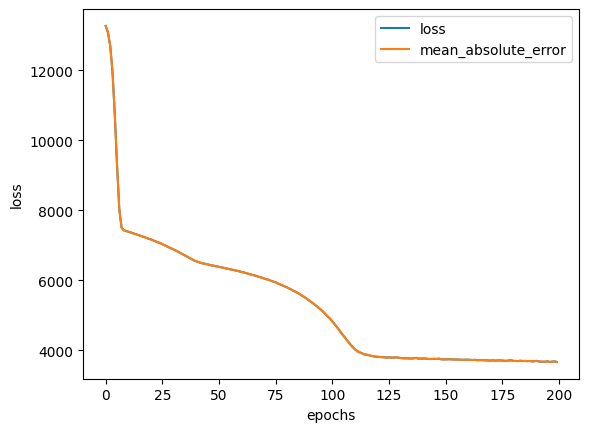

In [83]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to you model to stop training once it stops improving a certain metric.

# 65

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization

If you're not sure on which to use, you could try both and see which performs better.

```
X['age'].plot(kind="hist")
X['bmi'].plot(kind='hist')
X["children"].value_counts()
```

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 66

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [93]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [98]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [96]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [99]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

# 67

In [107]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mean_absolute_error,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=tf.keras.metrics.mean_absolute_error)

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13343.9238 - mean_absolute_error: 13343.9238
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13334.8135 - mean_absolute_error: 13334.8135
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.8174 - mean_absolute_error: 13312.8174
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.5693 - mean_absolute_error: 13267.5693
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 13188.2021 - mean_absolute_error: 13188.2021
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13063.6260 - mean_absolute_error: 13063.6260
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12883.2598 - mean_absolute_error: 12883.2598
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12636.8154 - mean_absolute_error: 12636.8154
Epoch 9/100
34/34 [==============================] - 0s 

In [108]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3438.6709 - mean_absolute_error: 3438.6709


[3438.6708984375, 3438.6708984375]

Insurance model 2 results (see above)<br>
We reduced the error by 30% with normalization!
```
9/9 [==============================] - 0s 4ms/step - loss: 4719.8179 - mean_absolute_error: 4719.8179

[4719.81787109375, 4719.81787109375]
```